In [1]:
# !pip install medmnist

In [2]:
# https://github.com/MedMNIST/MedMNIST/blob/main/examples/getting_started.ipynb

In [3]:
%load_ext autoreload
%autoreload 1

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import medmnist
from medmnist import INFO, Evaluator
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision
import torch.nn.functional as F

from tqdm import tqdm

%aimport basic_vae
%aimport utils
from utils import plot_real_vs_constructed 
# from basic_vae import VariationalAutoencoder

/home/ruben/anaconda3/envs/cv1/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# data_flag = 'pathmnist'
# data_flag = 'breastmnist'
# data_flag = 'octmnist'
# data_flag = 'chestmnist'
data_flag = 'bloodmnist'
# data_flag = 'organamnist'
# data_flag = 'tissuemnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 64
lr = 0.0001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)


Using downloaded and verified file: /home/ruben/.medmnist/bloodmnist.npz
Using downloaded and verified file: /home/ruben/.medmnist/bloodmnist.npz
Using downloaded and verified file: /home/ruben/.medmnist/bloodmnist.npz


In [6]:
train_dataset.imgs.shape

(11959, 28, 28, 3)

/home/ruben/anaconda3/envs/cv1/lib/python3.8/site-packages/medmnist/utils.py:25: FutureWarning: `multichannel` is a deprecated argument name for `montage`. It will be removed in version 1.0. Please use `channel_axis` instead.
  montage_arr = skimage_montage(sel_img, multichannel=(n_channels == 3))


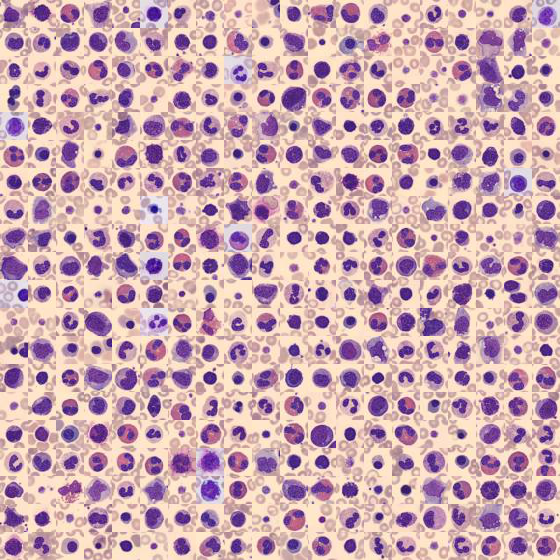

In [7]:
train_dataset.montage()

In [8]:
train_dataset.imgs.max()

255

In [9]:
# from beta_conv_vae import VariationalAutoencoder
from basic_vae import VariationalAutoencoder

latent_dims = 128 #hyperparameter we can optimze?
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vae = VariationalAutoencoder(latent_dims, mode="beta_vae", channels=3).to(device) # GPU

# vae.train(train_loader, lr=0.001, epochs=2, device=device)
# vae.train(train_loader, lr=0.0001, epochs=10, device=device)
# plot_latent(vae, train_loader)

In [10]:
vae.train(train_loader, lr=0.001, epochs=40, device=device)

100%|██████████| 187/187 [00:03<00:00, 46.76it/s]


Iteration: 0 Loss: 4184.77 Diff: 4065.02 KL: 119.75 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 57.43it/s]


Iteration: 1 Loss: 1276.14 Diff: 1164.57 KL: 111.57 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 56.49it/s]


Iteration: 2 Loss: 1043.23 Diff: 923.62 KL: 119.6 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 56.30it/s]


Iteration: 3 Loss: 937.85 Diff: 816.55 KL: 121.3 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 59.06it/s]


Iteration: 4 Loss: 862.73 Diff: 742.07 KL: 120.66 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 56.21it/s]


Iteration: 5 Loss: 811.75 Diff: 691.04 KL: 120.7 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 55.55it/s]


Iteration: 6 Loss: 771.0 Diff: 650.73 KL: 120.27 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 56.46it/s]


Iteration: 7 Loss: 727.45 Diff: 606.98 KL: 120.47 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 54.26it/s]


Iteration: 8 Loss: 697.4 Diff: 575.16 KL: 122.24 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 57.70it/s]


Iteration: 9 Loss: 665.27 Diff: 541.97 KL: 123.29 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 58.21it/s]


Iteration: 10 Loss: 640.92 Diff: 516.4 KL: 124.52 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 57.56it/s]


Iteration: 11 Loss: 622.25 Diff: 496.78 KL: 125.47 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 55.50it/s]


Iteration: 12 Loss: 606.51 Diff: 480.37 KL: 126.14 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 57.40it/s]


Iteration: 13 Loss: 585.76 Diff: 459.3 KL: 126.46 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 58.62it/s]


Iteration: 14 Loss: 575.71 Diff: 448.46 KL: 127.24 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 54.12it/s]


Iteration: 15 Loss: 568.78 Diff: 440.9 KL: 127.89 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 56.66it/s]


Iteration: 16 Loss: 554.44 Diff: 425.99 KL: 128.45 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 52.91it/s]


Iteration: 17 Loss: 541.9 Diff: 413.31 KL: 128.6 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 54.94it/s]


Iteration: 18 Loss: 534.24 Diff: 405.05 KL: 129.2 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 58.32it/s]


Iteration: 19 Loss: 526.52 Diff: 396.79 KL: 129.73 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 56.93it/s]


Iteration: 20 Loss: 520.87 Diff: 390.91 KL: 129.96 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 53.83it/s]


Iteration: 21 Loss: 513.63 Diff: 383.27 KL: 130.35 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 52.87it/s]


Iteration: 22 Loss: 510.63 Diff: 379.86 KL: 130.77 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 54.64it/s]


Iteration: 23 Loss: 503.34 Diff: 372.28 KL: 131.06 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 56.08it/s]


Iteration: 24 Loss: 501.48 Diff: 369.87 KL: 131.61 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 54.04it/s]


Iteration: 25 Loss: 493.36 Diff: 361.44 KL: 131.93 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 49.70it/s]


Iteration: 26 Loss: 490.55 Diff: 358.24 KL: 132.3 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 52.05it/s]


Iteration: 27 Loss: 486.92 Diff: 354.32 KL: 132.61 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 56.13it/s]


Iteration: 28 Loss: 488.85 Diff: 355.75 KL: 133.1 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 53.35it/s]


Iteration: 29 Loss: 481.14 Diff: 347.89 KL: 133.25 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 47.77it/s]


Iteration: 30 Loss: 475.82 Diff: 342.52 KL: 133.3 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 51.29it/s]


Iteration: 31 Loss: 474.4 Diff: 340.69 KL: 133.71 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 52.52it/s]


Iteration: 32 Loss: 470.52 Diff: 336.6 KL: 133.93 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 53.75it/s]


Iteration: 33 Loss: 468.34 Diff: 334.25 KL: 134.09 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 55.02it/s]


Iteration: 34 Loss: 466.48 Diff: 332.22 KL: 134.26 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 55.11it/s]


Iteration: 35 Loss: 464.94 Diff: 330.25 KL: 134.68 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 54.31it/s]


Iteration: 36 Loss: 466.19 Diff: 331.55 KL: 134.65 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 52.28it/s]


Iteration: 37 Loss: 464.54 Diff: 329.5 KL: 135.04 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 54.80it/s]


Iteration: 38 Loss: 455.72 Diff: 320.92 KL: 134.8 BCE: 0.0


100%|██████████| 187/187 [00:03<00:00, 57.18it/s]

Iteration: 39 Loss: 456.65 Diff: 321.39 KL: 135.26 BCE: 0.0


In [11]:
# vae.save_to_file(path="./blood_beta")

In [12]:
# vae.load_from_file(path="./blood_beta")

0.011975176632404327


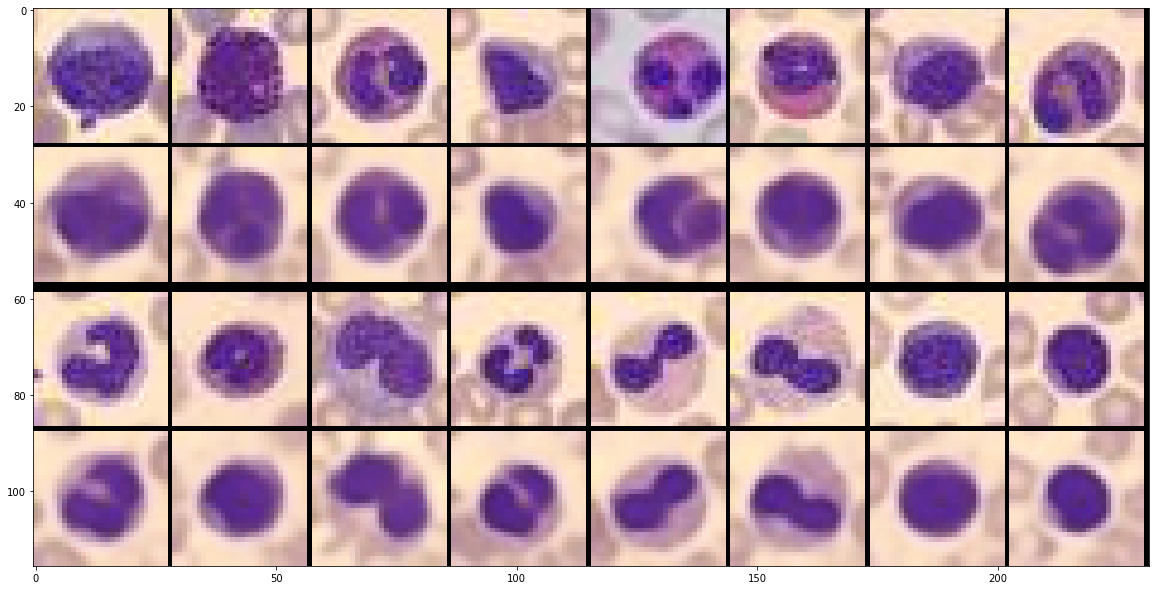

In [13]:
_ = plot_real_vs_constructed(vae, test_dataset, device)

torch.Size([1, 3, 28, 28])


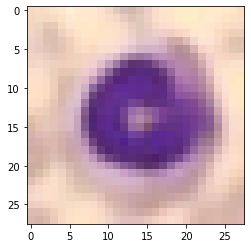

In [14]:
z = torch.randint(-1,1, (1,latent_dims), dtype=torch.float, device=device)
img = vae.decoder.forward(z)
print(img.shape)
# img = F.normalize(img)
plt.imshow(img.moveaxis(1,3).cpu().detach().numpy()[0], cmap="gray")
# plt.imshow(img.moveaxis(1, 3).cpu().detach().numpy()[0])
plt.show()

In [15]:
from PIL import Image

In [16]:
img.moveaxis(1,3).cpu().detach().numpy()[0].max()

0.999812

In [17]:
Image.fromarray(np.uint8(img.moveaxis(1,3).cpu().detach().numpy()[0]*255))

In [18]:
test_img = test_dataset[5][0][None,:,:,:].to(device)
lat = vae.encoder.forward(test_img)
img = vae.decoder.forward(lat)

[]

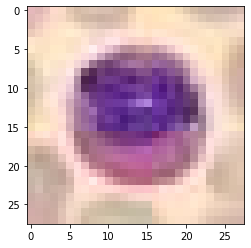

In [19]:
plt.imshow(test_img[0].moveaxis(0, 2).cpu().detach().numpy(), cmap="gray")
plt.plot()

[]

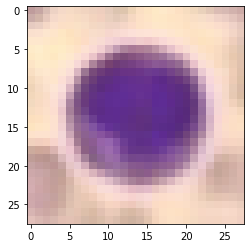

In [20]:
# img = F.normalize(img)
plt.imshow(img[0].moveaxis(0, 2).cpu().detach().numpy(), cmap="gray")
plt.plot()

# New Section

In [21]:
i = torch.randn((3, 28, 28))
cov1 = nn.Conv2d(3, 12, 3, stride=2)
cov2 = nn.Conv2d(12, 24, 3, stride=2)
cov2_5 = nn.Conv2d(24, 48, 3, stride=2)
m1 = nn.MaxPool2d(2)
m2 = nn.MaxUnpool2d(3)
lin1 = nn.Linear(192,192)
cov3 = nn.ConvTranspose2d(48,24,3, stride=2)#, output_padding=1)
cov4 = nn.ConvTranspose2d(24,12,4, stride=2)#, output_padding=1)
cov5 = nn.ConvTranspose2d(12,4,4, stride=2)#, output_padding=1)
cov6 = nn.ConvTranspose2d(4,3,3, stride=1)#, output_padding=1)
# cov7 = nn.ConvTranspose2d(3,3,1, stride=1)#, output_padding=1)
print(i.flatten().shape, i.shape)
x = cov1(i)
x = cov2(x)
x = cov2_5(x)
# x = m1(x)
print(x.flatten().shape, x.shape)
x = lin1(x.flatten())
x = x.reshape(48,2,2)
x = cov3(x)
x = cov4(x)
# x = cov4_5(x)
x = cov5(x)
x = cov6(x)
# x = cov7(x)
# x = m2(x)
print(x.flatten().shape, x.shape)


torch.Size([2352]) torch.Size([3, 28, 28])
torch.Size([192]) torch.Size([48, 2, 2])
torch.Size([2352]) torch.Size([3, 28, 28])


In [22]:
tmp = torch.randn((1, 3, 28, 28))
modules = []
hidden_dims = [32, 64, 128, 256] # 512
# hidden_dims = [28, 56, 112, 224]
# hidden_dims = [28, 56, 112]

in_channels = 3
for h_dim in hidden_dims:
    modules.append(
        nn.Sequential(
            nn.Conv2d(in_channels, out_channels=h_dim,
                        kernel_size= 3, stride= 2, padding  = 1),
            nn.BatchNorm2d(h_dim),
            nn.LeakyReLU())
    )
    in_channels = h_dim
encoder = nn.Sequential(*modules)

hidden_dims.reverse()
modules = []
for i in range(len(hidden_dims) - 1):
    modules.append(
        nn.Sequential(
            nn.ConvTranspose2d(hidden_dims[i],
                                hidden_dims[i + 1],
                                kernel_size=3,
                                stride = 2,
                                padding=1,
                                output_padding=1),
            nn.BatchNorm2d(hidden_dims[i + 1]),
            nn.LeakyReLU())
    )
decoder = nn.Sequential(*modules)

final_layer = nn.Sequential(
    nn.ConvTranspose2d(hidden_dims[-1],
                        hidden_dims[-1],
                        kernel_size=2,
                        stride=2,
                        padding=1),
    nn.BatchNorm2d(hidden_dims[-1]),
    nn.LeakyReLU(),
    nn.Conv2d(hidden_dims[-1], out_channels= 3,
                kernel_size= 3),
    nn.Tanh())

print(tmp.flatten().shape, tmp.shape)
x = encoder(tmp)
print(x.flatten().shape, x.shape)
print(torch.flatten(x, start_dim=1).shape)
x = decoder(x)
x = final_layer(x)
print(x.flatten().shape, x.shape)

torch.Size([2352]) torch.Size([1, 3, 28, 28])
torch.Size([1024]) torch.Size([1, 256, 2, 2])
torch.Size([1, 1024])
torch.Size([2352]) torch.Size([1, 3, 28, 28])
